In [10]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [38]:
from qiskit_textbook.widgets import binary_widget
 
# esc or ctrl + m toggle edit
# in toggle mode press 'l' to see line numbers

# pip3 install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
# pip3 install numexpr
binary_widget(nbits=4)

# ERROR
# VBox(children=(Label(value='Toggle the bits below to change the binary number.'), Label(value='Think of a numb…
# HTML(value='<pre>Binary   Decimal\n 0000 = 0</pre>')


HTML(value='<pre>Binary   Decimal\n 0000 = 0</pre>')

In [37]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b)


In [18]:
for j in range(n):
    qc_output.measure(j, j)

In [19]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c: 8/═╩══╩══╩══╩══╩══╩══╩══╩═
      0  1  2  3  4  5  6  7

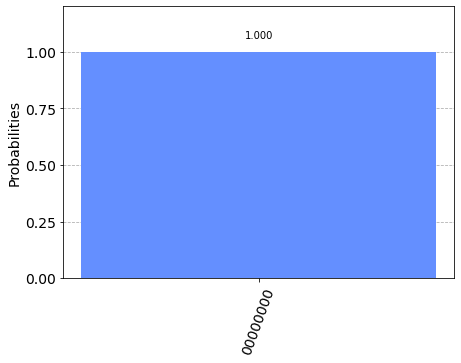

In [20]:
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [21]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

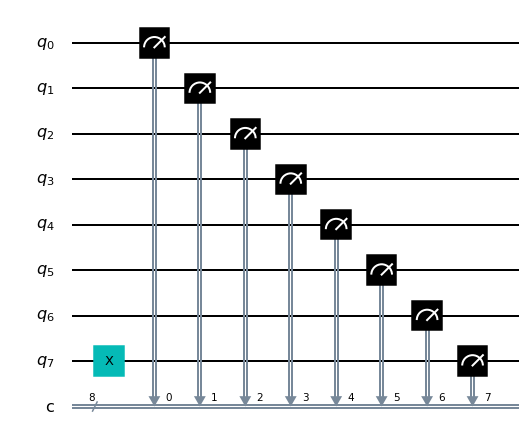

In [22]:
qc = qc_encode + qc_output
qc.draw(output='mpl', justify = 'none')

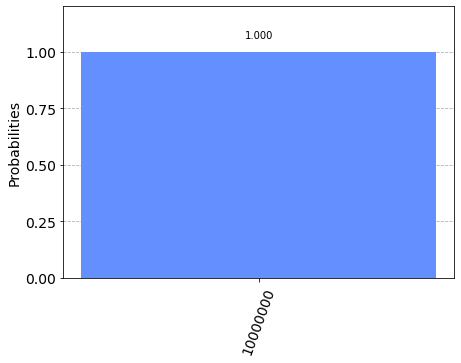

In [23]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


In [24]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)
qc_encode.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘
q_6: ─────
          
q_7: ─────

In [25]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0, 1)
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [26]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0, 1)
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [27]:
qc_ha = QuantumCircuit(4, 2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)
qc_ha.barrier()
qc_ha.measure(2, 0)
qc_ha.measure(3, 1)
qc_ha.draw()


┌───┐ ░            ░       
q_0: ┤ X ├─░───■────────░───────
     ├───┤ ░   │        ░       
q_1: ┤ X ├─░───┼────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├─░─┤M├───
           ░ └───┘└───┘ ░ └╥┘┌─┐
q_3: ──────░────────────░──╫─┤M├
           ░            ░  ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

In [31]:
qc_ha = QuantumCircuit(4, 2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()
qc_ha.measure(2, 0)
qc_ha.measure(3, 1)
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

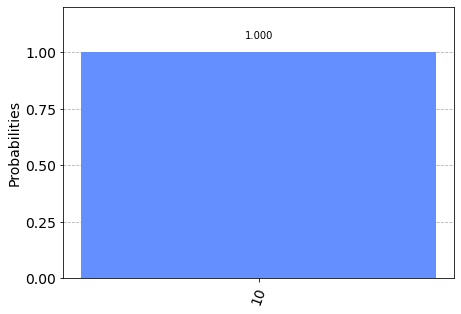

In [32]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


In [34]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.1',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.8.0',
 'qiskit-aqua': '0.7.5',
 'qiskit': '0.20.0'}